$\textbf{No Free Lunch:  Does the RMB Follow the SGD?}$

This is an exercise in the "No Free Lunch" warning.  
I want to evaluate how closely the RMB following the US dollar.  

- We need to use a numeraire currency.  
- Chinese said that they do not have the Swiff Franc in their "basket"
- So we set the RMB/CHF rate as the dependent variable 
- For regressors we take the values of the USD, Korean Wan, Japanese Yen, Euro and the UK Sterling against the CHF
- We calculate these rates from artibrate or as cross rates from their respective values against the US Dollar

- We do a regression below, for the data set since 2004, and find that the Dollar/CHF rate has the strongest effect on the RMB/CHF movements, followed by the Sterling and Korean Won.  Not so much the Euro, surprisingly.

- However when I add in the Singapore Dollar against the CHF, it has strong effects.
- Does this make sense? Should any of you go to the IMF or AMRO or the investment banking community and tell the leaders that the SMD has a strong effect on the movements of the RMB?

- Again this is a case of "knowing the data": the SGD is tied to the USD so that their is multicollinearity.


In [14]:
import pandas as pd
import yfinance as yf

# Define a list of currency pairs you want to retrieve
currency_pairs = [
    "CNY=X",  # Chinese Yuan (RMB) to USD
    "USDJPY=X",  # USD to Japanese Yen
    "USDKRW=X",  # USD to Korean Won
    "EURUSD=X",  # Euro to USD
   # "USDBTH=X",  # USD to Thai Baht
    "USDSGD=X",  # USD to Singapore Dollar
    "USDMYR=X",  # USD to Malaysian Ringgit
    "GBPUSD=X",  # British Pound to USD
    "EURCHF=X",  # Euro to Swiss Franc
  #  "AUDUSD=X",  # USD to Australian Dollar
   # "USDAUD=X",  # Australian Dollar to USD (cross rate)
    "USDCHF=X",  # USD to Swiss Franc
    "CHFUSD=X",  # Swiss Franc to USD (cross rate)
]

# Define a function to download exchange rate data
def download_exchange_rates(currency_pairs, start_date, end_date):
    data = yf.download(currency_pairs, start=start_date, end=end_date)
    return data["Adj Close"]

# Specify the date range for the exchange rate data
start_date = "2004-01-02"
end_date = "2023-10-01"

# Download the exchange rate data
exchange_rate_data = download_exchange_rates(currency_pairs, start_date, end_date)

# Print the first few rows of the data
#print(exchange_rate_data.head())
#exchange_rate_data_clean = exchange_rate_data.dropna(axis=1)

# Print the cleaned DataFrame
#print(exchange_rate_data_clean.head())


[*********************100%***********************]  10 of 10 completed


In [15]:
print(exchange_rate_data.head())

            CHFUSD=X     CNY=X  EURCHF=X  EURUSD=X  GBPUSD=X  USDCHF=X   
Date                                                                     
2004-01-02  0.806452  8.266900    1.5585  1.258194  1.793690    1.2400  \
2004-01-05  0.811688  8.267000    1.5630  1.268698  1.807207    1.2320   
2004-01-06  0.811754  8.267100    1.5670  1.272103  1.821295    1.2319   
2004-01-07  0.806777  8.267201    1.5670  1.264095  1.817785    1.2395   
2004-01-08  0.815262  8.267201    1.5666  1.277498  1.833887    1.2266   

              USDJPY=X     USDKRW=X  USDMYR=X  USDSGD=X  
Date                                                     
2004-01-02  106.910004  1195.800049    3.8019    1.7018  
2004-01-05  106.239998  1178.900024    3.7972    1.6975  
2004-01-06  106.230003  1189.400024    3.7950    1.6973  
2004-01-07  106.180000  1176.800049    3.8052    1.6962  
2004-01-08  106.169998  1171.000000    3.7988    1.6935  


In [16]:
exchange_rate_data_filled = exchange_rate_data.fillna(method='ffill')

In [127]:
exdata = exchange_rate_data_filled
print(exdata.columns)

Index(['CHFUSD=X', 'CNY=X', 'EURCHF=X', 'EURUSD=X', 'GBPUSD=X', 'USDCHF=X',
       'USDJPY=X', 'USDKRW=X', 'USDMYR=X', 'USDSGD=X', 'CHFEUR', 'MYRUSD',
       'SGDUSD', 'CNCH', 'CNCHF', 'USDCHF', 'CNJPY', 'JPYCHF', 'CNKRW',
       'KRWCHF', 'EURCHF', 'GBPCHF', 'SGDCHF'],
      dtype='object')


In [107]:

CNY = exdata['CNY=X']
exdata['CHFEUR'] = 1 / exdata['EURCHF=X']
exdata['MYRUSD'] = exdata['USDMYR=X']
exdata['SGDUSD'] = 1/exdata['USDSGD=X']
exdata['USDCHF'] = 1/exdata['USDCHF=X']
exdata['CNCHF'] = exdata['CNY=X']*exdata['USDCHF']  # rmb to swiss frank
exdata['JPYCHF'] = exdata['USDJPY=X'] * exdata['USDCHF']
exdata['KRWCHF'] = exdata['USDKRW=X'] * exdata['USDCHF']
exdata['EURCHF'] = 1/exdata['EURCHF=X'] 
exdata['GBPCHF'] = 1/exdata['GBPUSD=X'] * exdata['USDCHF']
exdata['SGDCHF']=  exdata['USDSGD=X'] * exdata['USDCHF']



In [108]:

Y = exdata['CNCHF']
X = exdata[['USDCHF', 'JPYCHF', 'KRWCHF', 'EURCHF','GBPCHF']]
X = X.replace(0, np.nan)
Y = Y.replace(0, np.nan)
X1 = X.fillna(method='ffill')
Y1 = Y.fillna(method='ffill')

X1 = X1.replace(0, np.nan).fillna(method='ffill')
Y1 = Y1.replace(0, np.nan).fillna(method='ffill')

# Print X1 and Y1 after zero value replacement
print("X1 after zero value replacement:", X1)
print("Y1 after zero value replacement:", Y1)

X1 after zero value replacement:               USDCHF      JPYCHF       KRWCHF    EURCHF    GBPCHF
Date                                                             
2004-01-02  0.806452   86.217744   964.354871  0.641643  0.449605
2004-01-05  0.811688   86.233765   956.899376  0.639795  0.449140
2004-01-06  0.811754   86.232653   965.500485  0.638162  0.445702
2004-01-07  0.806777   85.663571   949.415091  0.638162  0.443824
2004-01-08  0.815262   86.556329   954.671410  0.638325  0.444554
...              ...         ...          ...       ...       ...
2023-09-25  1.102414  163.635765  1471.348255  1.035325  0.900529
2023-09-26  1.096395  163.155651  1467.469921  1.035154  0.897717
2023-09-27  1.091989  162.755527  1478.280367  1.033165  0.898991
2023-09-28  1.085989  162.353122  1469.147010  1.033795  0.894898
2023-09-29  1.093183  163.252664  1473.446571  1.034961  0.895699

[5151 rows x 5 columns]
Y1 after zero value replacement: Date
2004-01-02    6.666855
2004-01-05    6.710227


In [109]:
X1 = pd.DataFrame(X1)
Y1 = pd.DataFrame(Y1)

# Calculate log first differences for X1 and Y1 if needed
X1diff = X1.pct_change() * 100 
Y1diff = Y1.pct_change() * 100 

# Print X1_diff and Y1_diff
print("X1diff:")
print(X1diff)

print("Y1_diff:")
print(Y1diff)









X1diff:
              USDCHF    JPYCHF    KRWCHF    EURCHF    GBPCHF
Date                                                        
2004-01-02       NaN       NaN       NaN       NaN       NaN
2004-01-05  0.649352  0.018582 -0.773107 -0.287902 -0.103476
2004-01-06  0.008119 -0.001289  0.898852 -0.255269 -0.765435
2004-01-07 -0.613156 -0.659938 -1.666016  0.000000 -0.421281
2004-01-08  1.051687  1.042168  0.553638  0.025537  0.164462
...              ...       ...       ...       ...       ...
2023-09-25 -0.289934  0.243591 -0.773925 -0.162545  0.136667
2023-09-26 -0.546001 -0.293404 -0.263590 -0.016566 -0.312236
2023-09-27 -0.401851 -0.245241  0.736672 -0.192165  0.141880
2023-09-28 -0.549512 -0.247245 -0.617837  0.060990 -0.455287
2023-09-29  0.662469  0.554065  0.292657  0.112810  0.089552

[5151 rows x 5 columns]
Y1_diff:
               CNCHF
Date                
2004-01-02       NaN
2004-01-05  0.650571
2004-01-06  0.009330
2004-01-07 -0.611941
2004-01-08  1.051687
...              .

In [126]:
print(df.columns)


Index(['CNY=X'], dtype='object')


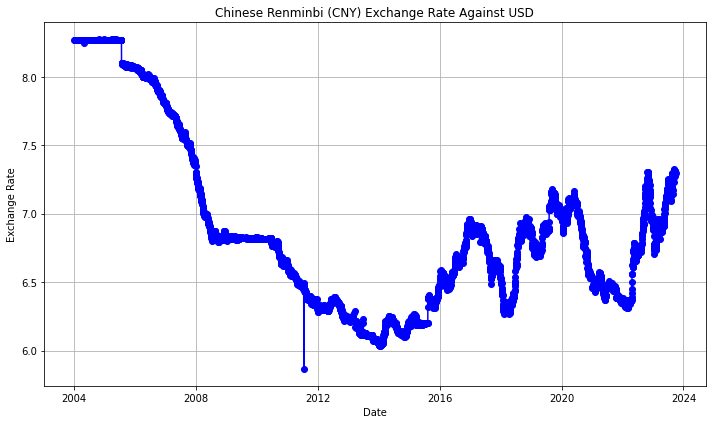

In [128]:
import matplotlib.pyplot as plt
df = pd.DataFrame(CNY)

# Convert the 'Date' column to a datetime format
#df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index of the DataFrame
#df.set_index('Date', inplace=True)

# Plot the CNY to USD exchange rate
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CNY=X'], marker='o', linestyle='-', color='b')
plt.title('Chinese Renminbi (CNY) Exchange Rate Against USD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

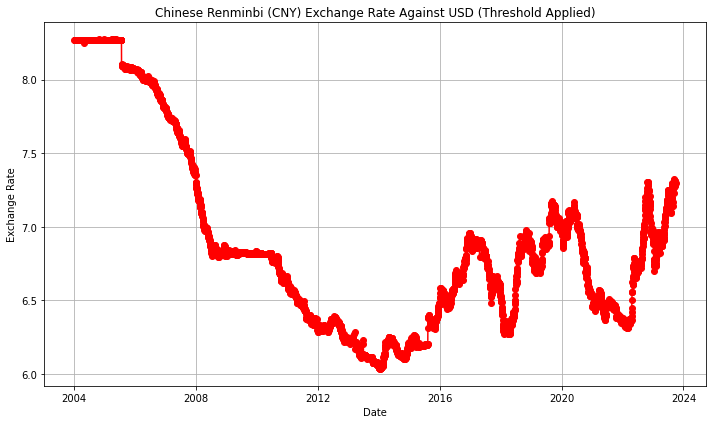

In [130]:
threshold = 6.0  # Define the threshold value

# Identify rows where 'CNY=X' is below the threshold
mask = df['CNY=X'] < threshold

# Replace values below the threshold with the previous value
df.loc[mask, 'CNY=X'] = df.loc[mask, 'CNY=X'].shift(1)

# Plot the updated DataFrame
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CNY=X'], marker='o', linestyle='-', color='r')
plt.title('Chinese Renminbi (CNY) Exchange Rate Against USD (Threshold Applied)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [131]:
import statsmodels.api as sm


In [111]:
Y1diff = Y1diff[1:]
X1diff = X1diff[1:]

X1diff = sm.add_constant(X1diff)  # Adding a cons
model = sm.OLS(Y1diff, X1diff).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  CNCHF   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     5508.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:36:32   Log-Likelihood:                -812.48
No. Observations:                5150   AIC:                             1637.
Df Residuals:                    5144   BIC:                             1676.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.004     -0.666      0.5

In [114]:
Y = exdata['CNCHF']
X = exdata[['USDCHF', 'JPYCHF', 'KRWCHF', 'EURCHF','GBPCHF', 'SGDCHF']]
X = X.replace(0, np.nan)
Y = Y.replace(0, np.nan)
X1 = X.fillna(method='ffill')
Y1 = Y.fillna(method='ffill')

X1 = X1.replace(0, np.nan).fillna(method='ffill')
Y1 = Y1.replace(0, np.nan).fillna(method='ffill')
X1 = pd.DataFrame(X1)
Y1 = pd.DataFrame(Y1)

# Calculate log first differences for X1 and Y1 if needed
X1diff = X1.pct_change() * 100 
Y1diff = Y1.pct_change() * 100 

# Print X1_diff and Y1_diff
print("X1diff:")
print(X1diff)

print("Y1_diff:")
print(Y1diff)
Y1diff = Y1diff[1:]
X1diff = X1diff[1:]

X1diff = sm.add_constant(X1diff)  # Adding a cons
model = sm.OLS(Y1diff, X1diff).fit()

# Print the regression summary
print(model.summary())

X1diff:
              USDCHF    JPYCHF    KRWCHF    EURCHF    GBPCHF    SGDCHF
Date                                                                  
2004-01-02       NaN       NaN       NaN       NaN       NaN       NaN
2004-01-05  0.649352  0.018582 -0.773107 -0.287902 -0.103476  0.395038
2004-01-06  0.008119 -0.001289  0.898852 -0.255269 -0.765435 -0.003666
2004-01-07 -0.613156 -0.659938 -1.666016  0.000000 -0.421281 -0.677564
2004-01-08  1.051687  1.042168  0.553638  0.025537  0.164462  0.890835
...              ...       ...       ...       ...       ...       ...
2023-09-25 -0.289934  0.243591 -0.773925 -0.162545  0.136667 -0.343923
2023-09-26 -0.546001 -0.293404 -0.263590 -0.016566 -0.312236 -0.517608
2023-09-27 -0.401851 -0.245241  0.736672 -0.192165  0.141880 -0.205750
2023-09-28 -0.549512 -0.247245 -0.617837  0.060990 -0.455287 -0.256725
2023-09-29  0.662469  0.554065  0.292657  0.112810  0.089552  0.157294

[5151 rows x 6 columns]
Y1_diff:
               CNCHF
Date          